# Housing Price Prediction

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
house_price = data['median_house_value']
house_price.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Bivariate Analysis

In [5]:
import matplotlib.pyplot as plt

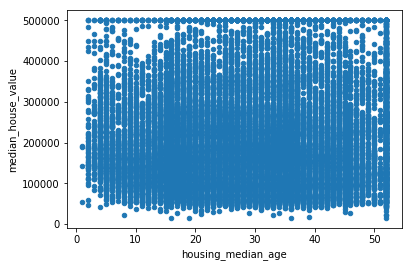

In [8]:
# data[['housing_median_age', 'median_house_value']].plot.scatter(x='housing_median_age', y='median_house_value')

In [9]:
data.corr(data['median_house_value', 'housing_median_age'])

KeyError: ('median_house_value', 'housing_median_age')

In [10]:
data['median_house_value'].corr(data['housing_median_age'])

0.10562341249321

## Multivariate Analysis

In [11]:
import seaborn as sns

In [14]:
data.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [18]:
data.drop(['total_bedrooms'], axis=1, inplace=True)
data.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [29]:
# data.columns.tolist()
new_data = data[['longitude','latitude',
 'housing_median_age',
 'total_rooms',
 'population',
 'households',
 'median_income',
 'median_house_value']]

In [30]:
new_data.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0


In [35]:
correlation = new_data.corr()

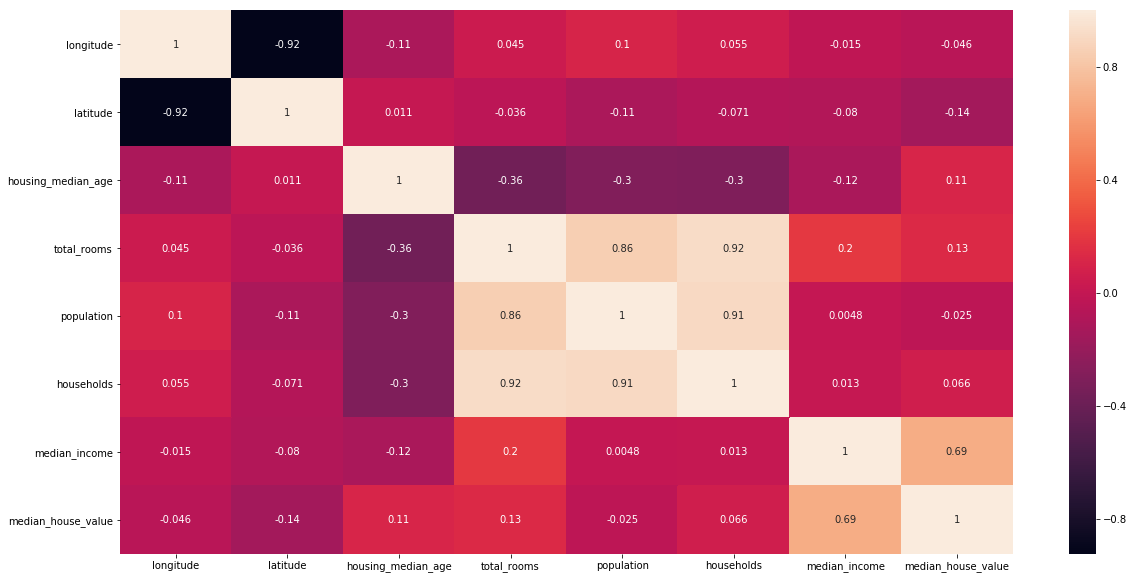

In [38]:
plt.figure(figsize=(20, 10))
sns.heatmap(correlation, annot=True)
plt.show()

In [32]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
dtypes: float64(8)
memory usage: 1.3 MB


In [33]:
new_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
output_data = new_data['median_house_value']

In [44]:
new_data.drop(['median_house_value'], axis=1, inplace=True)
new_data.head()

c:\users\jatinder\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,longitude,latitude,housing_median_age,total_rooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462


In [45]:
X, x_test, Y, y_test = train_test_split(new_data, output_data, test_size=0.2, random_state=42)

In [46]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income
14196,-117.03,32.71,33.0,3126.0,2300.0,623.0,3.2596
8267,-118.16,33.77,49.0,3382.0,1314.0,756.0,3.8125
17445,-120.48,34.66,4.0,1897.0,915.0,336.0,4.1563
14265,-117.11,32.69,36.0,1421.0,1418.0,355.0,1.9425
2271,-119.80,36.78,43.0,2382.0,874.0,380.0,3.5542


In [47]:
x_test

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income
20046,-119.01,36.06,25.0,1505.0,1392.0,359.0,1.6812
3024,-119.46,35.14,30.0,2943.0,1565.0,584.0,2.5313
15663,-122.44,37.80,52.0,3830.0,1310.0,963.0,3.4801
20484,-118.72,34.28,17.0,3051.0,1705.0,495.0,5.7376
9814,-121.93,36.62,34.0,2351.0,1063.0,428.0,3.7250
13311,-117.61,34.08,12.0,4427.0,2400.0,843.0,4.7147
7113,-118.02,33.89,36.0,1375.0,670.0,221.0,5.0839
7668,-118.08,33.92,38.0,1335.0,1011.0,269.0,3.6908
18246,-122.08,37.39,4.0,2292.0,1050.0,584.0,4.8036
5723,-118.23,34.18,45.0,2332.0,943.0,339.0,8.1132


In [48]:
X.shape

(16512, 7)

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
model = LinearRegression()

In [51]:
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
prediction = model.predict(x_test)

In [54]:
prediction

array([ 58963.79919708, 178872.10191219, 319660.25412472, ...,
       443374.42840775, 138268.12934552, 173596.56568812])

In [56]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [57]:
rmse = np.sqrt(mean_squared_error(prediction, y_test))
rmse

70517.83385628034

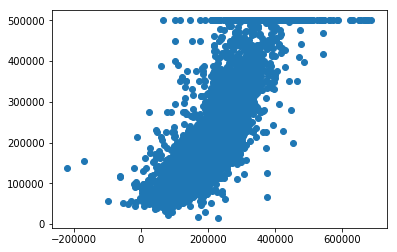

In [60]:
plt.scatter(prediction, y_test)
plt.show()